In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns", 200)

In [326]:
data = pd.read_csv("Car details v3.csv")

In [327]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [328]:
data = data.astype("str")

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   object
 2   selling_price  8128 non-null   object
 3   km_driven      8128 non-null   object
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        8128 non-null   object
 9   engine         8128 non-null   object
 10  max_power      8128 non-null   object
 11  torque         8128 non-null   object
 12  seats          8128 non-null   object
dtypes: object(13)
memory usage: 825.6+ KB


In [330]:
data['mileage Km/L'] = data['mileage'].str.extract(pat = "([0-9]*\\.[0-9]+)")
data['engine CC'] = data['engine'].str.extract(pat = "([0-9]+)")
data['max_power hp'] = data['max_power'].str.extract(pat = '([0-9]+.[0-9]{,2})')
data['max_power hp']


0          74 
1       103.52
2          78 
3          90 
4         88.2
         ...  
8123     82.85
8124      110 
8125      73.9
8126       70 
8127       70 
Name: max_power hp, Length: 8128, dtype: object

In [331]:
data = data.drop(['mileage','engine','max_power'], axis=1)

In [332]:
data.isna()['seats'].value_counts()

seats
False    8128
Name: count, dtype: int64

In [333]:
data.shape

(8128, 13)

There is no company name for the cars, so lets add that column (First Word)

In [334]:
data['company'] = data['name'].str.split(n=0).map(lambda x: x[0])

In [335]:
data = data.astype("Int64", errors='ignore')

In [336]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage Km/L,engine CC,max_power hp,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.4,1248,74,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.2,Maruti


In [337]:
transmission_by_year = data.groupby(['year', 'transmission'])['name'].count()
transmission_by_year = transmission_by_year.unstack(level='transmission').fillna(0)
transmission_by_year.head()

transmission,Automatic,Manual
year,,
1983,0.0,1.0
1991,0.0,1.0
1994,0.0,3.0
1995,0.0,2.0
1996,0.0,3.0


In [338]:
transmission_by_year['sum'] = transmission_by_year.sum(axis=1)
transmission_by_year.head()

transmission,Automatic,Manual,sum
year,,,
1983,0.0,1.0,1.0
1991,0.0,1.0,1.0
1994,0.0,3.0,3.0
1995,0.0,2.0,2.0
1996,0.0,3.0,3.0


In [339]:
transmission_by_year_pct = transmission_by_year[['Automatic', 'Manual']].div(transmission_by_year.sum(axis=1), axis=0) *100

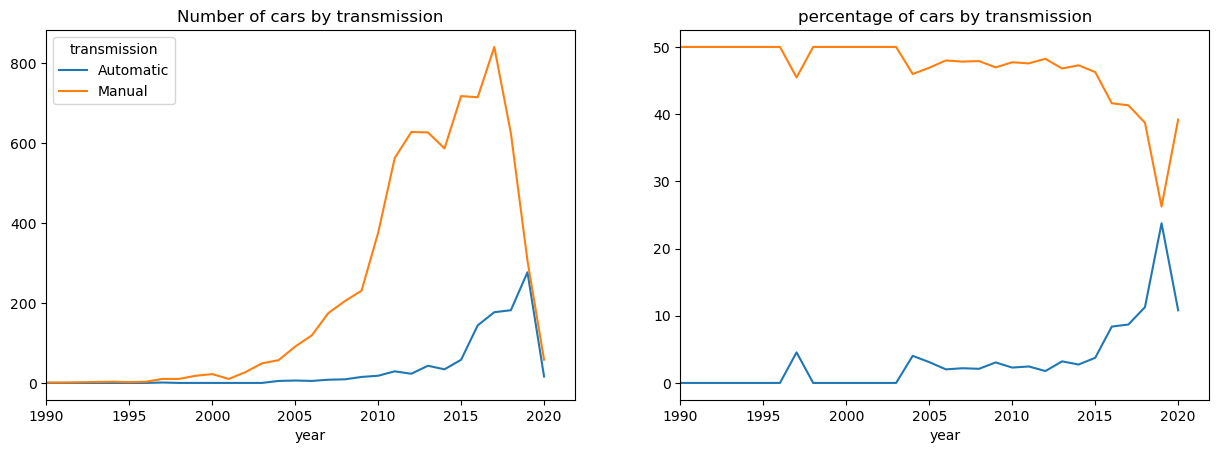

In [340]:
fig, axes = plt.subplots(1,2, sharex=True)
fig.set_figwidth(15)
transmission_by_year[['Automatic','Manual']].plot(ax=axes[0],legend=True)
axes[0].set(title="Number of cars by transmission", xlim=1990)
transmission_by_year_pct.plot(ax=axes[1], legend=False)
axes[1].set(title="percentage of cars by transmission", xlim=1990);
# fig.legend()

In [341]:
data['fuel'] = data['fuel'].astype('category')

Lets see if there is a correlation somewhere first lets clean it up

In [342]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage Km/L,engine CC,max_power hp,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.4,1248,74,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.2,Maruti


In [343]:
data[['mileage Km/L', 'engine CC', 'max_power hp', 'seats']] = data[['mileage Km/L',
                                                                     'engine CC', 'max_power hp', 'seats']].astype('float')

In [344]:
data[['seller_type', 'transmission', 'owner']] = data[['seller_type', 'transmission', 'owner']].astype("category")

In [345]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage Km/L,engine CC,max_power hp,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20,Maruti


In [346]:
data['engine CC'] = data['engine CC'].map(lambda x: round(x,-2))

In [353]:
cc_count = data['engine CC'].value_counts()

<Axes: xlabel='engine CC'>

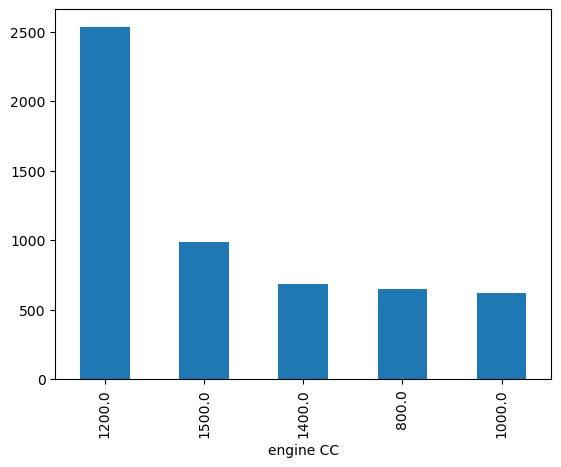

In [396]:
cc_count.nlargest(5).plot.bar()

Lets check for a particular cc cars, the correlation of selling price and km driven

In [370]:
cc_1200 = data[data['engine CC'] == 1200]

In [380]:
cc_1200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2535 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           2535 non-null   object  
 1   year           2535 non-null   Int64   
 2   selling_price  2535 non-null   Int64   
 3   km_driven      2535 non-null   Int64   
 4   fuel           2535 non-null   category
 5   seller_type    2535 non-null   category
 6   transmission   2535 non-null   category
 7   owner          2535 non-null   category
 8   torque         2535 non-null   object  
 9   seats          2535 non-null   float64 
 10  mileage Km/L   2535 non-null   float64 
 11  engine CC      2535 non-null   float64 
 12  max_power hp   2535 non-null   float64 
 13  company        2535 non-null   object  
dtypes: Int64(3), category(4), float64(4), object(3)
memory usage: 235.8+ KB


<Axes: xlabel='engine CC', ylabel='max_power hp'>

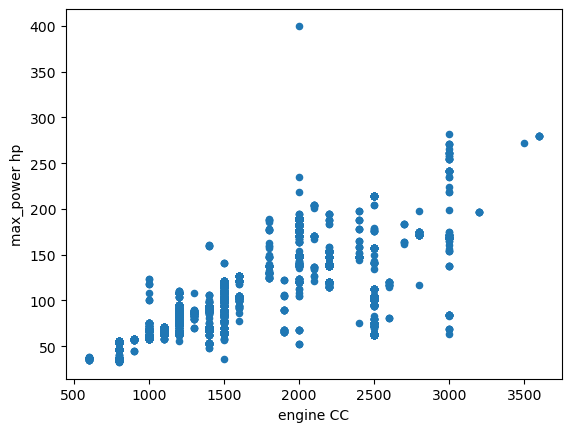

In [400]:
data[['engine CC','max_power hp']].plot.scatter(x='engine CC', y='max_power hp')

<Axes: >

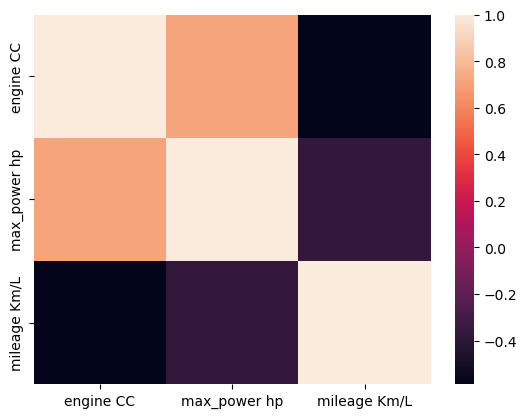

In [391]:
sns.heatmap(data[['engine CC','max_power hp','mileage Km/L']].corr())